### STA 4365: Homework 2
**Instructions**: Finsih the assignment and submit the saved notebook to webcourses. For question details, read *HW2.pdf*.

**Your name:**

**Your ID:**

## Problem 1:


(1172, 1758, 3)


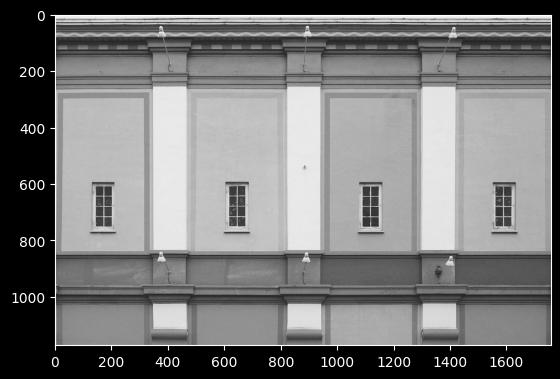

In [13]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from numpy import mean

A = cv2.imread('data/building_original.png')
plt.imshow(A)

print(A.shape)

In [14]:
A = mean(A,2)

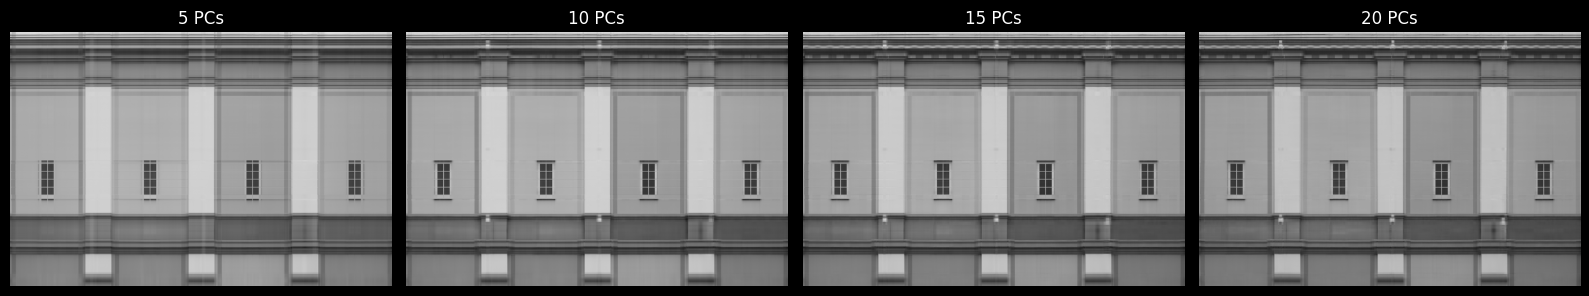

In [15]:
from sklearn import decomposition
import matplotlib.ticker as tic

component_list = [5, 10, 15, 20]
fig, axes = plt.subplots(1, len(component_list), figsize=(16, 4))

for ax, components in zip(axes, component_list):
    pca = decomposition.PCA(n_components=components)
    Rec = pca.inverse_transform(pca.fit_transform(A))

    ax.imshow(Rec, cmap='gray')
    ax.set_title(f'{components} PCs')
    ax.set_frame_on(False)
    ax.xaxis.set_major_locator(tic.NullLocator())
    ax.yaxis.set_major_locator(tic.NullLocator())

plt.tight_layout()
plt.show()


## Problem 2

Calling in the files again, not needed as I have them above but im doing it again since its a new problem

In [37]:
from matrix_completion import pmf_solve
from skimage.transform import resize
import numpy as np
original = plt.imread('data/building_original.png')
sampled = plt.imread('data/building_sampled.png')


Relative Error: 0.8578


Downsampling because of how large the image is, it simply was not loading it in when experimenting

In [ ]:
scale = 0.25
orig_small = resize(original, (int(original.shape[0]*scale), int(original.shape[1]*scale)))
samp_small = resize(sampled, (int(sampled.shape[0]*scale), int(sampled.shape[1]*scale)))

mask = (samp_small > 0).astype(int)
reconstructed = pmf_solve(samp_small, mask, k=20, mu=1e-2)


Relative error

In [ ]:
err = np.linalg.norm(orig_small - reconstructed, 'fro') / np.linalg.norm(orig_small, 'fro')
print(f"Relative Error: {err:.4f}")

Simple plots for the images

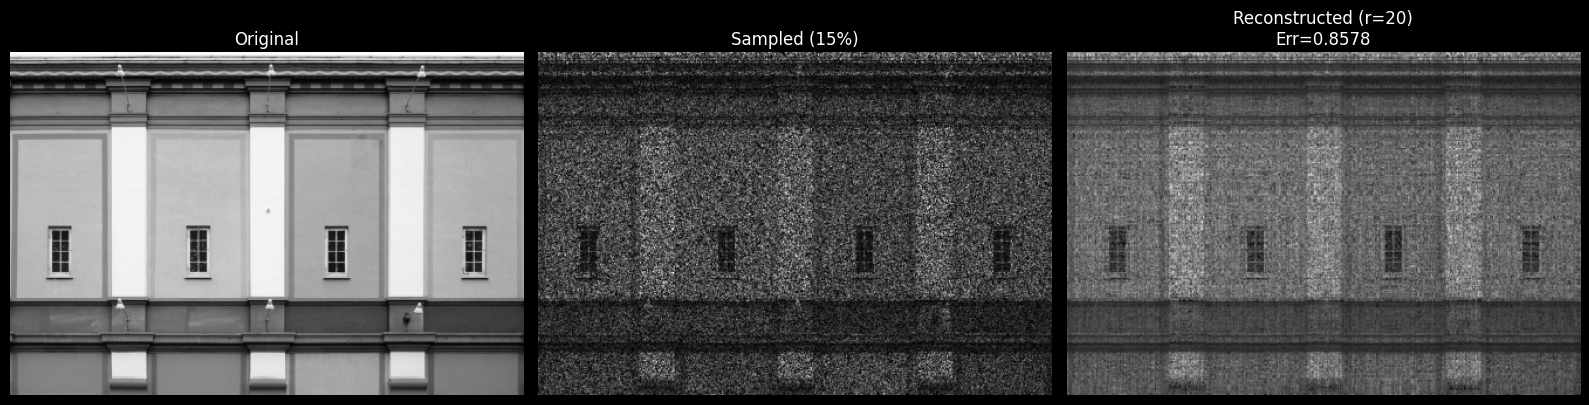

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].imshow(orig_small, cmap='gray')
axes[0].set_title('Original')

axes[1].imshow(samp_small, cmap='gray')
axes[1].set_title('Sampled (15%)')

axes[2].imshow(reconstructed, cmap='gray')
axes[2].set_title(f'Reconstructed (r=20)\nErr={err:.4f}')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

The sampled image was reconstructed from 15% of the original pixel values using Probabilistic Matrix Factorization (PMF). The sampling index set Ω was constructed by recording the locations of all non-zero pixels in the sampled image. PMF was applied with rank r = 20 and regularization parameter μ = 0.01.

The reconstructed image captures the overall structure of the original building image with reasonable visual fidelity given only 15% of pixels were observed. The reconstruction quality was evaluated using relative Frobenius norm error